<a href="https://colab.research.google.com/github/Deeksha-coder-debug/ML-Projects/blob/main/Face_mask_detection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saideekshacoder","key":"3c4c983d2bd526bed4832dfdb0531c8c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 73% 119M/163M [00:00<00:00, 1.24GB/s]
100% 163M/163M [00:00<00:00, 1.12GB/s]


Unzipping the dataset file

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import os

In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')
without_mask_files=os.listdir('/content/data/without_mask')

print('No. of images with mask : ',len(with_mask_files))
print('No. of images without mask : ',len(without_mask_files))

No. of images with mask :  3725
No. of images without mask :  3828


**Creating labels for 2 classes of images

with mask = 1

without mask =0**

In [ ]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels=with_mask_labels+without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


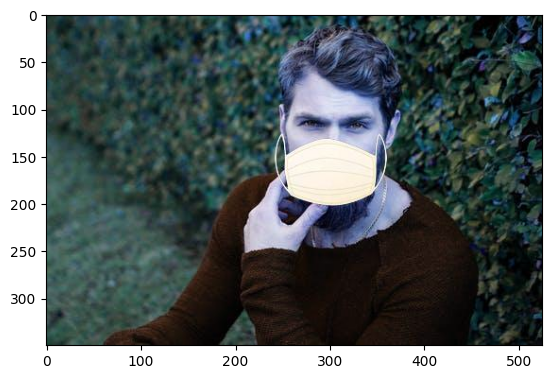

In [ ]:
img=cv2.imread('/content/data/with_mask/with_mask_1.jpg')

plt.imshow(img)
plt.show()

In [ ]:
# convert img to numpy array

with_mask_path='/content/data/with_mask/'
data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)


7553

In [ ]:
type(data)

list

array([[[ 98,  93,  89],
        [100,  95,  90],
        [101,  96,  90],
        ...,
        [ 91,  86,  80],
        [ 91,  86,  80],
        [ 89,  84,  78]],

       [[ 97,  92,  88],
        [102,  97,  92],
        [ 97,  92,  86],
        ...,
        [ 89,  84,  78],
        [ 89,  84,  78],
        [ 87,  82,  76]],

       [[ 98,  93,  89],
        [ 98,  93,  88],
        [ 97,  92,  86],
        ...,
        [ 88,  83,  77],
        [ 87,  82,  76],
        [ 87,  82,  76]],

       ...,

       [[ 58,  66,  86],
        [ 52,  59,  78],
        [ 47,  54,  70],
        ...,
        [222, 177, 150],
        [218, 172, 148],
        [204, 158, 137]],

       [[ 50,  60,  75],
        [ 45,  54,  68],
        [ 42,  50,  63],
        ...,
        [215, 171, 145],
        [209, 164, 140],
        [193, 148, 127]],

       [[ 52,  62,  75],
        [ 44,  53,  65],
        [ 41,  49,  60],
        ...,
        [210, 166, 140],
        [200, 155, 131],
        [177, 134, 114]]], dtype=uint8)
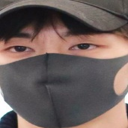

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X=np.array(data)
y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


# **Train Test split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train

array([[[[253, 240, 245],
         [254, 248, 247],
         [251, 255, 247],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        [[245, 254, 237],
         [210, 238, 202],
         [158, 205, 151],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        [[232, 255, 227],
         [152, 211, 147],
         [ 27, 119,  21],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 16,  15,  21],
         [ 14,  13,  19],
         [ 16,  15,  21]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 14,  13,  19],
         [ 13,  12,  18],
         [ 12,  11,  17]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 13,  12,  18],
        

In [ ]:
X_train_scaled

array([[[[0.99215686, 0.94117647, 0.96078431],
         [0.99607843, 0.97254902, 0.96862745],
         [0.98431373, 1.        , 0.96862745],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.96078431, 0.99607843, 0.92941176],
         [0.82352941, 0.93333333, 0.79215686],
         [0.61960784, 0.80392157, 0.59215686],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.90980392, 1.        , 0.89019608],
         [0.59607843, 0.82745098, 0.57647059],
         [0.10588235, 0.46666667, 0.08235294],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

# **Building a CNN Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
num_of_classes=2

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

🌟 First, recall Categorical Cross Entropy (CCE)

It’s a loss function used for multi-class classification.

It measures how far your predicted probabilities are from the actual labels.

Formula (for one sample):

𝐿
=
−
∑
𝑖
=
1
𝐶
𝑦
𝑖
⋅
log
⁡
(
𝑝
𝑖
)
L=−
i=1
∑
C
	​

y
i
	​

⋅log(p
i
	​

)

where

𝐶
C = number of classes

𝑦
𝑖
y
i
	​

 = true label (one-hot encoded → only one entry is 1, rest 0)

𝑝
𝑖
p
i
	​

 = predicted probability for class
𝑖
i.

🌟 Now, what is Sparse Categorical Cross Entropy?

Same as CCE, but you don’t need one-hot encoding of labels.

Instead, you directly pass the integer class label.

👉 Example:

Suppose you have 3 classes: [cat, dog, horse]

True label for a sample is dog.

CCE (normal) requires:
y_true = [0, 1, 0] (one-hot encoding)

SCCE (sparse) allows:
y_true = 1 (just the index of the correct class)

And the loss formula becomes:

𝐿
=
−
log
⁡
(
𝑝
true class
)
L=−log(p
true class
	​

)

where
𝑝
true class
p
true class
	​

 is the probability assigned to the actual class.

In [ ]:
# compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the model
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.6838 - loss: 0.6940 - val_accuracy: 0.8876 - val_loss: 0.2860
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8800 - loss: 0.3079 - val_accuracy: 0.9140 - val_loss: 0.2465
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9062 - loss: 0.2442 - val_accuracy: 0.9124 - val_loss: 0.2536
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9198 - loss: 0.2149 - val_accuracy: 0.9174 - val_loss: 0.2323
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9342 - loss: 0.1698 - val_accuracy: 0.9124 - val_loss: 0.2454


# **Model Evaluation**

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print("Test accuracy : ",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9109 - loss: 0.2088
Test accuracy :  0.9146260619163513


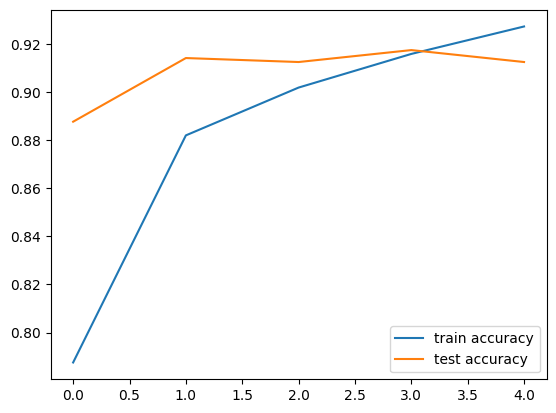

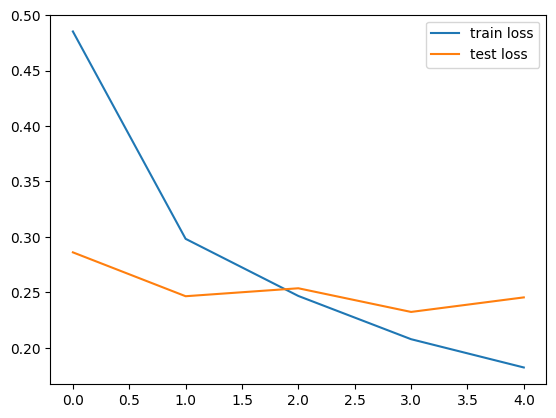

In [ ]:
# plot the accuracy value
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.legend()
plt.show()

# plot the loss value
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.legend()
plt.show()

# **Predictive system**

Path of the image to be predicted : /content/test without mask.jpeg


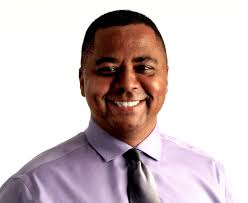

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.5949854 0.5589228]]
0
The person in image is not wearing mask


In [ ]:
img_path=input('Path of the image to be predicted : ')

input_img=cv2.imread(img_path)
cv2_imshow(input_img)

img_resized=cv2.resize(input_img,(128,128))
img_scaled=img_resized/255
img_reshaped=np.reshape(img_scaled,[1,128,128,3])
input_prediction=model.predict(img_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print('The person in image is wearing mask')
else:
  print('The person in image is not wearing mask')